In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

x_data = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]], dtype = np.float32)

t_data = np.array([[0], [1], [1], [0]], dtype = np.float32)

# TF 2.0 구현 
keras_model = Sequential()
# keras_model.add(Flatten(input_shape=(2,))) # 아래행처럼 더하기가 가능
keras_model.add(Dense(100, activation='sigmoid', input_shape=(2,)))
keras_model.add(Dense(6, activation='sigmoid'))
keras_model.add(Dense(1, activation='sigmoid'))


keras_model.compile(optimizer=SGD(learning_rate=1e-1), loss='binary_crossentropy',
                   metrics=['accuracy'])


history = keras_model.fit(x_data, t_data, 
                         epochs = 30000, verbose = 0,)

predict_val = keras_model.predict(x_data)

result = tf.cast(predict_val>=0.5, dtype=tf.float32).numpy().ravel()

print(classification_report(t_data.ravel(), result))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



dict_keys(['loss', 'accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

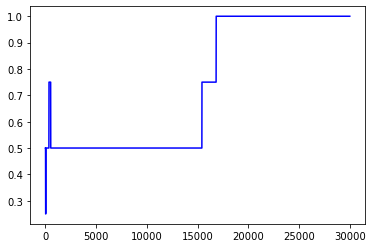

In [27]:
import matplotlib.pyplot as plt
print(history.history.keys())
# dict_keys(['loss', accuracy])의 accuracy는
# epoch당 train data를 이용한 accuracy를 의미

plt.plot(history.history['accuracy'], color ='b')
plt.show